<a href="https://colab.research.google.com/github/nahbos/AUT-Fundamental-Statistical-Learning/blob/main/HW02/Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobhan Moradian Daghigh

- 12-23-2022

### Ex02 - Q6

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.stats import norm
import pandas as pd
import math

## a.

In [5]:
n = 100
mu = 5
sigma = 1
X = norm.rvs(loc=mu, scale=sigma, size=n)
X

array([2.39646694, 4.79948747, 4.24443902, 4.60732381, 4.19258178,
       5.37652784, 5.65689465, 5.84018853, 5.11695069, 7.11565749,
       5.83210301, 6.24805685, 3.66587109, 5.17586117, 3.17206153,
       5.98649221, 5.42462209, 5.34016499, 5.25363963, 4.08876923,
       6.19059116, 4.66199022, 5.0877446 , 7.31915351, 6.44508619,
       5.05585615, 4.64750763, 5.06163634, 6.09770953, 4.11344961,
       4.64440089, 5.75421603, 4.6375773 , 5.90470921, 6.36889299,
       5.00632379, 4.46488253, 4.0616834 , 5.37841119, 5.5381068 ,
       6.37402705, 3.4726645 , 5.67344958, 5.86948302, 3.9693797 ,
       4.10976103, 5.70454437, 5.35888106, 5.61080477, 3.80938206,
       5.21220957, 7.33993263, 6.20867659, 6.05852969, 4.31144472,
       3.92095057, 4.91570889, 3.82189278, 4.98927858, 5.17695881,
       5.70012322, 6.35773459, 3.59952384, 7.08707564, 5.43307235,
       6.24867449, 4.92611328, 5.52436453, 6.4368743 , 4.63316257,
       4.42418325, 4.45383119, 5.43643203, 6.13364059, 4.68668

## b.

In [6]:
mu_hat = X.mean()
mu_values = np.linspace(4, 6, 100)

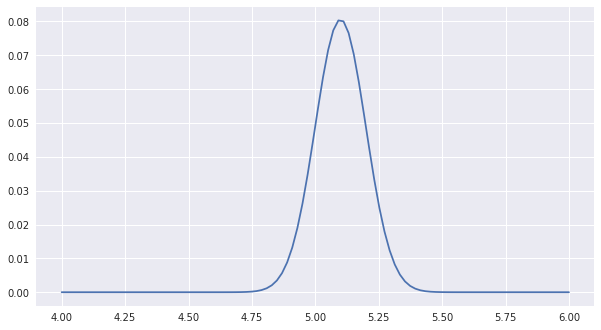

In [9]:
likelihood = np.vectorize(lambda mu_hat: np.exp(np.log(norm.pdf(X, loc=mu_hat, scale=sigma)).sum()))
L_i = likelihood(mu_values)
L_i2 = norm.pdf(mu_values, loc=mu_hat, scale=sigma/np.sqrt(n))

with plt.style.context('seaborn'):
  plt.figure(figsize=(10, 5.5))
  plt.plot(mu_values, L_i / L_i.sum())


## c.

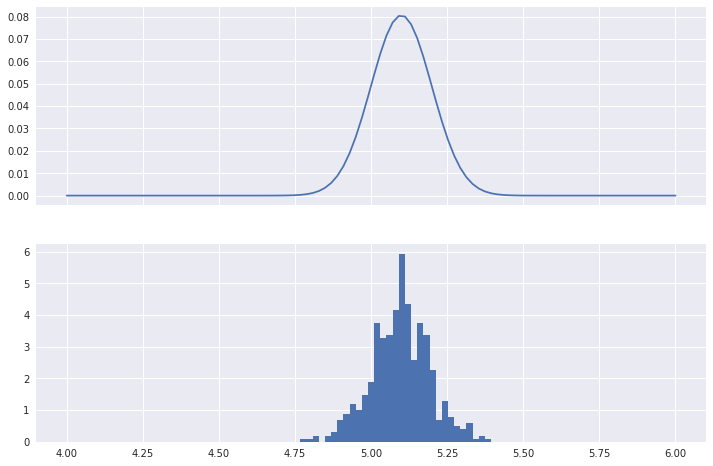

In [17]:
with plt.style.context('seaborn'):
  fig, (ax1,ax2) = plt.subplots(2, 1, sharex='col', figsize=(12, 8))
  ax1.plot(mu_values, L_i2 / L_i2.sum())

  posterior_samples = norm.rvs(loc=mu_hat, scale=sigma/np.sqrt(n), size=500)
  ax2.hist(posterior_samples, density=True, bins=mu_values);

# d.

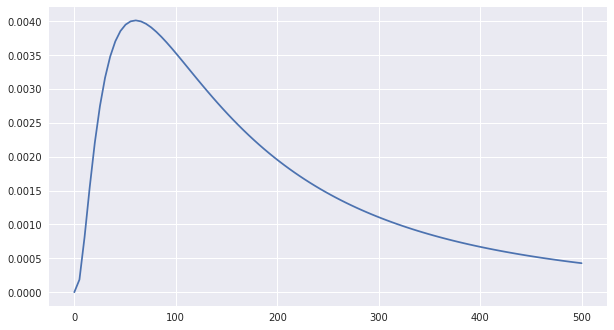

In [19]:
def posterior_density(z):
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.where(z > 0, norm.pdf(np.log(z) - mu_hat) / z, 0)
    
z_values = np.linspace(0, 500, 100)
f_values = posterior_density(z_values)

with plt.style.context('seaborn'):
  plt.figure(figsize=(10, 5.5))
  plt.plot(z_values, f_values);

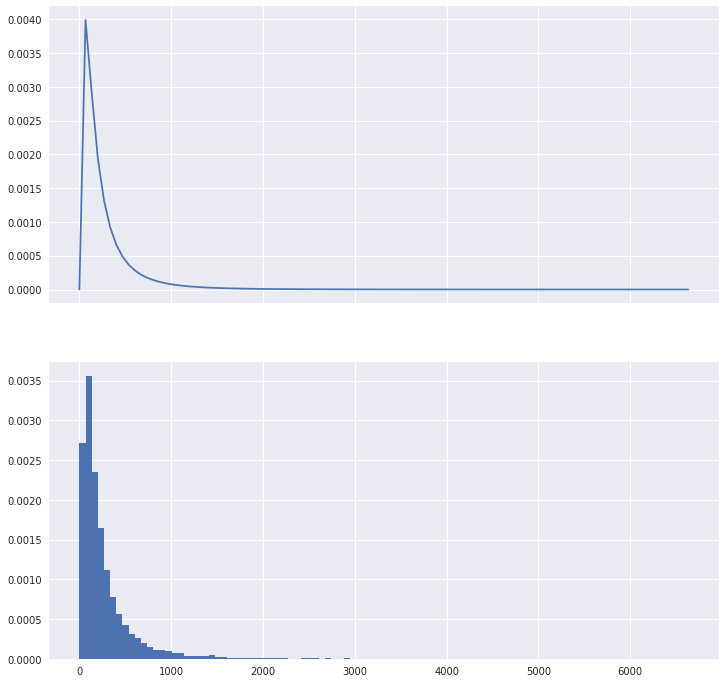

In [23]:
# Resample from the estimated parametric distribution for X, and calculate Y = exp(X)
Y = np.exp(norm.rvs(loc=mu_hat, scale=sigma, size=10000))

# Recompute ranges for plot based on observed Y values
z_values = np.linspace(0, max(Y), 100)
f_values = posterior_density(z_values)

with plt.style.context('seaborn'):
  fig, (ax1,ax2) = plt.subplots(2, 1, sharex='col', figsize=(12, 12))
  ax1.plot(z_values, f_values)
  ax2.hist(Y, density=True, bins=z_values)

# e.

In [30]:
# 97%
z_015 = norm.ppf(0.015)
z_985 = norm.ppf(0.985)

confidence_interval_analytic = (np.exp(z_015 + mu_hat), np.exp(z_985 + mu_hat))
print("97%% confidence interval: (%.3f, %.3f)" % confidence_interval_analytic)

97% confidence interval: (18.713, 1435.717)


In [29]:
# 93%
z_035 = norm.ppf(0.035)
z_965 = norm.ppf(0.965)

confidence_interval_analytic = (np.exp(z_035 + mu_hat), np.exp(z_965 + mu_hat))
print("93%% confidence interval: (%.3f, %.3f)" % confidence_interval_analytic)

93% confidence interval: (26.774, 1003.491)


Finito